<a href="https://colab.research.google.com/github/rajatsadh24/Jupyter_notebooks/blob/master/Quesion_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

Saving house.csv to house.csv


Importing important libraries. This will help in analysis.

In [3]:
#importing the necessary libraries
import os 
import pandas as pd #pandas will help us with data manipulation and analysis
import numpy as np #numpy lets us quickly perform operations on numerical data
import seaborn as sns #seaborn is helpful with data visualization
import matplotlib.pyplot as plt #matplotlib will let us form useful plots

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import scipy as sp
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

house_PATH = os.path.join("datasets")     
import pandas as pd
def load_house_data(house_path=house_PATH): 
    csv_path = os.path.join(house_path, "house.csv")    
    return pd.read_csv(csv_path) #assigning our housing data to a pandas dataframe so that we can use it
house=load_house_data()

Getting a sneak peak into the data.

In [5]:
house.info() #gives us a brief summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

In [6]:
house.head()#previewing the data/making sure that it was loaded correctly

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503


In [7]:
house.isna().sum() #This will return the total number of null values in each column

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

As we can see there are no null values in the dataset. We can go further with the datset.

Getting summary of the dataset.

In [8]:
house.describe()
# does not give information about object values

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503


In [10]:
house.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,98144,47.5941,-122.299,1020,1357


In [11]:
house = house.drop(["id"], axis=1)#dropping the ID column from our dataset

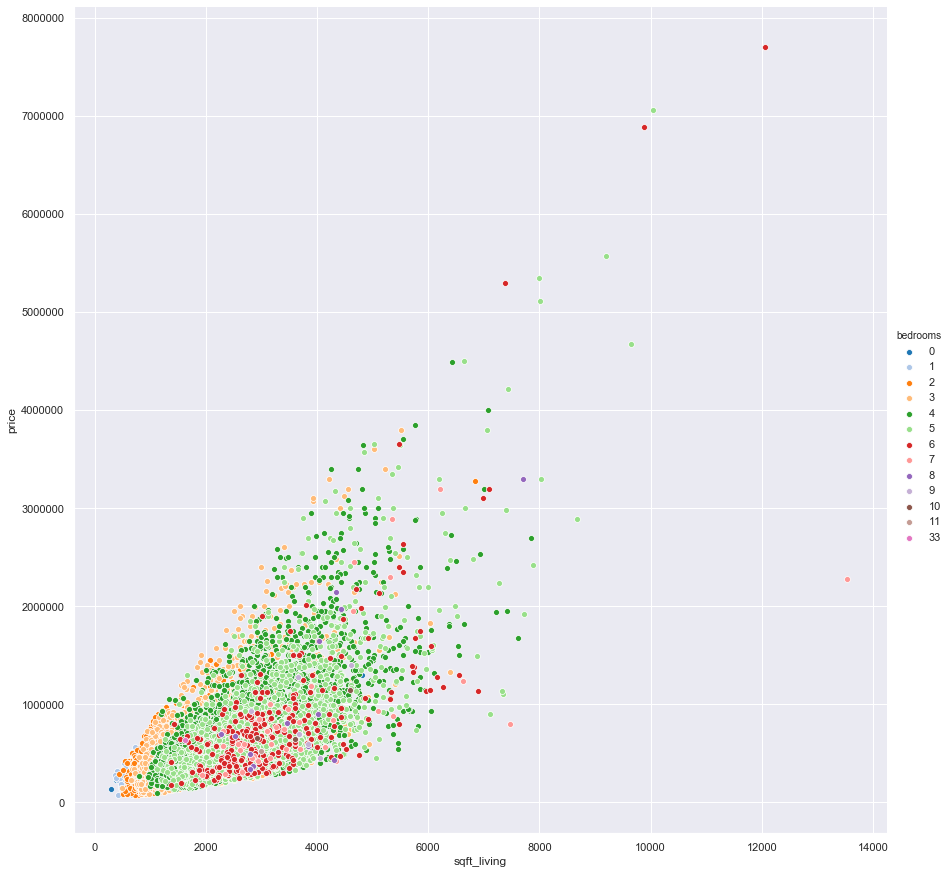

In [ ]:
g = sns.pairplot(house,y_vars='price', x_vars='sqft_living',hue='bedrooms', palette='tab20',height=12)

The scatter-plot of price vs sqft_living shows upward trend (larger the living area more the price). There are some outliers as well.

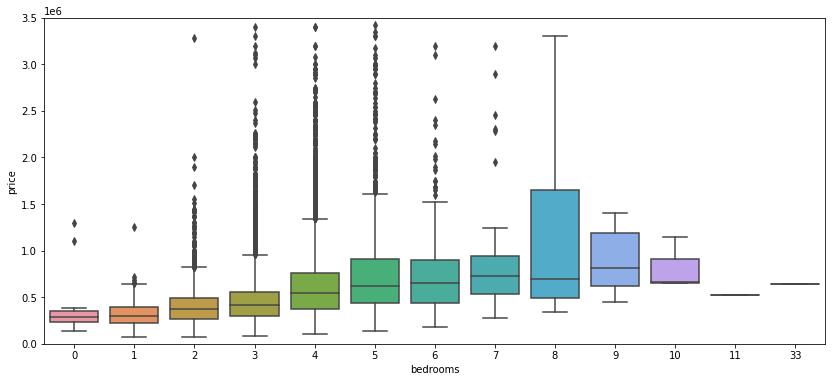

In [12]:
var = 'bedrooms'
data = pd.concat([house['price'], house[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=house)
fig.axis(ymin=0, ymax=3500000);

These are the box plots and we can see there are a lot of outliers with houses having 2,3,4,5 and 6 bedrooms.

In [ ]:
#Check Multicolinearity

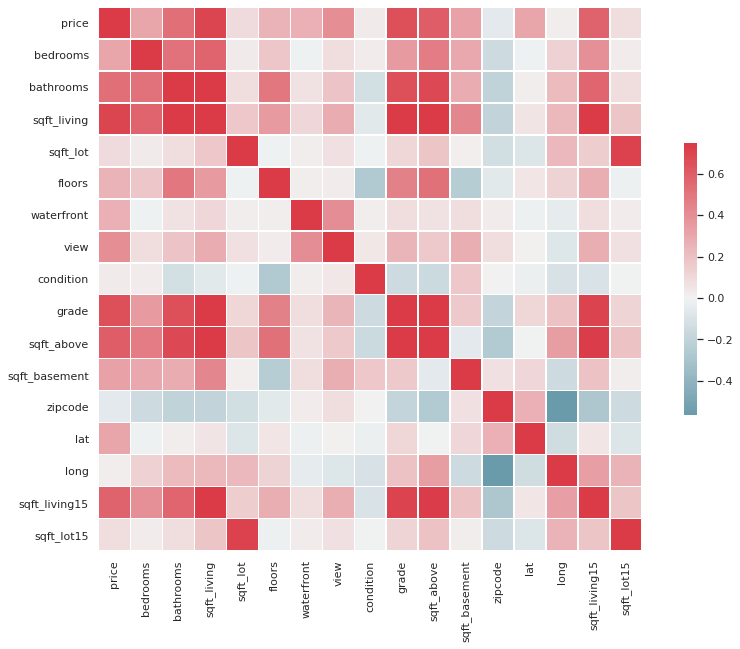

In [13]:
corr = house.corr() # making a covariance matrix
sns.set(font_scale=1.0)
plt.figure(figsize=(15,10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.75, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The heatmap shows the variables like sqft_iving15, sqft_lot15 and sqft_living15, sqft_above have high correlation indicating high multicolliniarity and this correlation might affect model performance and the model might be problematic for generalization.

In [14]:
abs(corr) > 0.75 #this provides a table displaying "true" where correlations between two variables are greater than .75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False


there's high multicolinearity between sqft_living and sqft_above, bathrooms, and sqft_living15, so let's remove sqft_living. Grade has multicollinearity with sqft_livingand sqft_above. Let us remove grade from our dataset.

In [15]:
house.drop(['sqft_living'], axis=1, inplace=True) #dropping the sqft_living column and the grade column
house.drop(['grade'], axis=1, inplace=True)

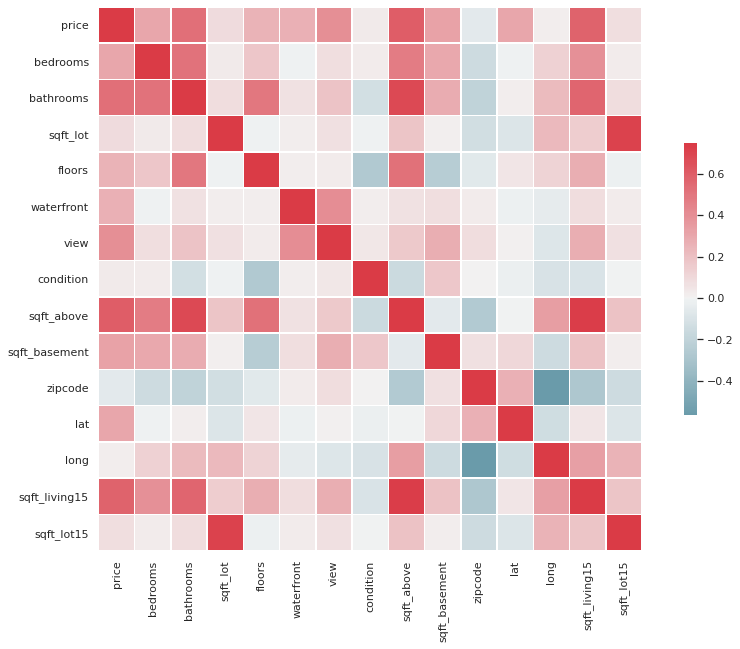

In [16]:
corr = house.corr() # making a covariance matrix
sns.set(font_scale=1.0)
plt.figure(figsize=(15,10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.75, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

We have dropped majority of highly correlated features.

Outliers

In [17]:
house.describe() #I am going to scan the data for outliers 

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,1.510697e+04,1.494309,0.007542,0.234303,3.409430,1788.390691,291.509045,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,4.142051e+04,0.539989,0.086517,0.766318,0.650743,828.090978,442.575043,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,290.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,1560.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,2210.000000,560.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


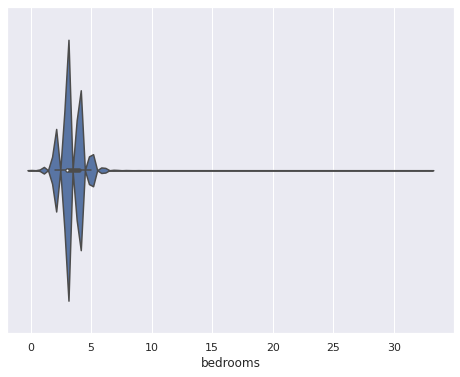

In [18]:
#bedrooms being 33>
plt.figure(figsize=(8,6))
sns.violinplot(house.bedrooms) #I'm going to look at a violin plot to look for outliers here
#Wider sections of the violin plot represent a higher probability of observations taking a given value, the thinner sections correspond to a lower probability.

In [19]:
# Digging on outliers
house.bedrooms.sort_values(ascending = False).head() #that way we can see more exactly what our outliers are

15870    33
8757     11
19254    10
13314    10
15161    10
Name: bedrooms, dtype: int64

Listing the outliers.

In [20]:
print(house.loc[[15870]]) # Digging on outliers
print(house.loc[[8757]])# Access group of values using labels.
print(house.loc[[19254]])
print(house.loc[[13314]])
print(house.loc[[15161]])

          price  bedrooms  bathrooms  sqft_lot  floors  waterfront  view  \
15870  640000.0        33       1.75      6000     1.0           0     0   

       condition  sqft_above  sqft_basement  zipcode      lat     long  \
15870          5        1040            580    98103  47.6878 -122.331   

       sqft_living15  sqft_lot15  
15870           1330        4700  
         price  bedrooms  bathrooms  sqft_lot  floors  waterfront  view  \
8757  520000.0        11        3.0      4960     2.0           0     0   

      condition  sqft_above  sqft_basement  zipcode     lat     long  \
8757          3        2400            600    98106  47.556 -122.363   

      sqft_living15  sqft_lot15  
8757           1420        4960  
          price  bedrooms  bathrooms  sqft_lot  floors  waterfront  view  \
19254  660000.0        10        3.0      3745     2.0           0     0   

       condition  sqft_above  sqft_basement  zipcode      lat    long  \
19254          4        1860          

In [21]:
#judging by the data in those rows, I think the 33 and 11 were both just entered incorrectly
house = house[house.bedrooms <= 10] #dropping these 2 rows.
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21611 non-null  float64
 1   bedrooms       21611 non-null  int64  
 2   bathrooms      21611 non-null  float64
 3   sqft_lot       21611 non-null  int64  
 4   floors         21611 non-null  float64
 5   waterfront     21611 non-null  int64  
 6   view           21611 non-null  int64  
 7   condition      21611 non-null  int64  
 8   sqft_above     21611 non-null  int64  
 9   sqft_basement  21611 non-null  int64  
 10  zipcode        21611 non-null  int64  
 11  lat            21611 non-null  float64
 12  long           21611 non-null  float64
 13  sqft_living15  21611 non-null  int64  
 14  sqft_lot15     21611 non-null  int64  
dtypes: float64(5), int64(10)
memory usage: 2.6 MB


Any dependence on watefront/number of times viewed

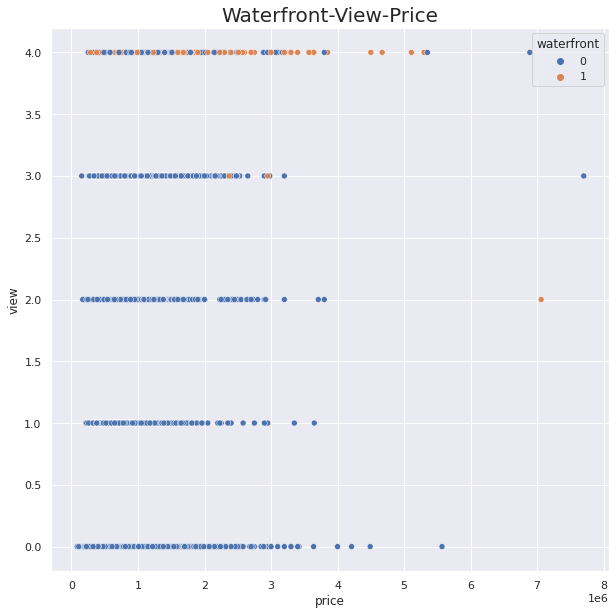

In [23]:
plt.figure(figsize=(10,10))
plt.title('Waterfront-View-Price', fontsize=20) #adding a title
ax = sns.scatterplot(y="view", x="price", hue = "waterfront", data=house) #defining what variables we want in our graph

1. waterfront properties do sell for more than houses that are not waterfront properties.
2. There are more number of views if there is waterfront meaning houses with waterfront are likely to attract buyers.

Splitting of data into numerical and categorical to deal with these types of variables differently.

In [ ]:
house.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,5650,1.0,0,0,3,1180,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,7242,2.0,0,0,3,2170,400,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,10000,1.0,0,0,3,770,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,5000,1.0,0,0,5,1050,910,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,8080,1.0,0,0,3,1680,0,98074,47.6168,-122.045,1800,7503


In [24]:
#creating 2 new dataframes from our existing dataframe, one for categorical data and the other for numerical data
house_categorical = house[['waterfront','view', 'condition','zipcode']].copy()
house_quantitative = house[['price', 'bathrooms', 'bedrooms','floors', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']].copy()

Dealing with Categorical Variables

View

In [25]:
house_categorical.view.value_counts() #Non viewed are much much more than viewed

0    19487
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [26]:
#creating bins no viewed vs viewed only
bins = [0, 1,4]
# showing pandas which column we want to be binned
bins_view = pd.cut(house_categorical['view'], bins, include_lowest = True, labels = ["no view", "view"])
#cut could convert ages to groups of age ranges.
bins_view = bins_view.cat.as_unordered() 

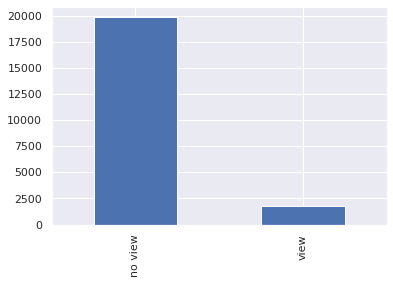

In [27]:
bins_view.value_counts().plot(kind='bar') #plotting a bar graph to preview these results

There are more number of houses with no view. The data is skewd.

In [29]:
house_categorical.condition.unique() #checking to see the range of values in our data

array([3, 5, 4, 1, 2])

In [28]:
house_categorical.condition.value_counts() #2-3 are most crowded

3    14030
4     5679
5     1700
2      172
1       30
Name: condition, dtype: int64

Creating bins to reduce no. of categories.

In [30]:

#Binning 5 condition into categories
# 1 Below avergae,  2-3 represent avergage, 4-5 good
#creating bins "Below avergae","avergage","good"
bins = [1, 2,4,5]
# showing pandas which column we want to be binned
bins_condition = pd.cut(house_categorical['condition'], bins, include_lowest = True, labels = ["Below avergae","avergage","good"])
bins_condition = bins_condition.cat.as_unordered() 



Creating 3 categories (Average, Good and Below average to represent bins)

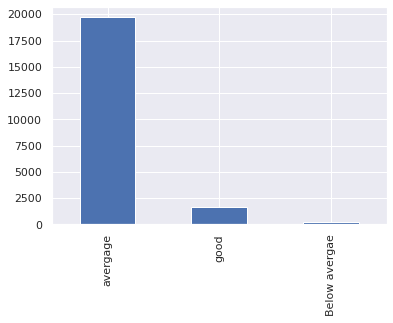

In [31]:
bins_condition.value_counts().plot(kind='bar') #plotting a bar graph to preview these results

In [32]:
house_categorical.waterfront.unique() #checking to see the range of values in our data
#No need of binning

array([0, 1])

In [33]:
house_categorical.head()

,waterfront,view,condition,zipcode
0,0,0,3,98178
1,0,0,3,98125
2,0,0,3,98028
3,0,0,5,98136
4,0,0,3,98074


In [34]:
house_categorical = house_categorical.drop(["view","condition"], axis=1) #removing the pre-binned columns
house_categorical = pd.concat([house_categorical, bins_view, bins_condition], axis=1) #and replacing them with the new binned columns

In [35]:
house_categorical.head()

,waterfront,zipcode,view,condition
0,0,98178,no view,avergage
1,0,98125,no view,avergage
2,0,98028,no view,avergage
3,0,98136,no view,good
4,0,98074,no view,avergage


In [36]:
#switching the remaining catogorical columns to objects so that we can one-hot encode them later
house_categorical['waterfront'] = house_categorical['waterfront'].astype("str")
house_categorical['zipcode'] = house_categorical['zipcode'].astype("str")

In [37]:
house_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   waterfront  21611 non-null  object  
 1   zipcode     21611 non-null  object  
 2   view        21611 non-null  category
 3   condition   21611 non-null  category
dtypes: category(2), object(2)
memory usage: 548.9+ KB


One-Hot Encoding for converting these categorical variables into binaries and then using feature selection algorithm to choose most important features.

In [38]:
house_categorical = pd.get_dummies(house_categorical,drop_first=True) #one-hot encoding our data
house_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 73 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   waterfront_1        21611 non-null  uint8
 1   zipcode_98002       21611 non-null  uint8
 2   zipcode_98003       21611 non-null  uint8
 3   zipcode_98004       21611 non-null  uint8
 4   zipcode_98005       21611 non-null  uint8
 5   zipcode_98006       21611 non-null  uint8
 6   zipcode_98007       21611 non-null  uint8
 7   zipcode_98008       21611 non-null  uint8
 8   zipcode_98010       21611 non-null  uint8
 9   zipcode_98011       21611 non-null  uint8
 10  zipcode_98014       21611 non-null  uint8
 11  zipcode_98019       21611 non-null  uint8
 12  zipcode_98022       21611 non-null  uint8
 13  zipcode_98023       21611 non-null  uint8
 14  zipcode_98024       21611 non-null  uint8
 15  zipcode_98027       21611 non-null  uint8
 16  zipcode_98028       21611 non-null  uint

Now lets look at numerical data. We will scale and normalize the data to get better statistical results. Scaling also helps in reducing efforts required for calculation for computer.

In [39]:
#Normalize the data. Take each value in a column, subtracting the column's mean from it, and then dividing by the column's standard deviation.

In [41]:
from sklearn.preprocessing import StandardScaler #importing StandardScaler
scaler = StandardScaler() #this is how we will reference StandardScaler
# transforms the data into a distribution with a mean of 0 and a standard deviation of 1
#creating a new dataframe of scaled data
# z-scores are not necessarily normally distributed. They just scale the data and follow the same distribution as the original input.
house_scaled = pd.DataFrame(scaler.fit_transform(house_quantitative),columns = house_quantitative.columns) #fitting and transforming our data


house_scaled.head() 

,price,bathrooms,bedrooms,floors,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,-0.866370,-1.447417,-0.407191,-0.915420,-0.228333,-0.734704,-0.658602,-0.352521,-0.306165,-0.943429,-0.260731
1,-0.005930,0.175636,-0.407191,0.936501,-0.189899,0.460826,0.245198,1.161579,-0.746426,-0.432765,-0.187887
2,-0.980424,-1.447417,-1.510339,-0.915420,-0.123315,-1.229823,-0.658602,1.283544,-0.135742,1.070047,-0.172395
3,0.173725,1.149468,0.695957,-0.915420,-0.244025,-0.891693,1.397542,-0.283239,-1.271898,-0.914248,-0.284537
4,-0.082147,-0.148975,-0.407191,-0.915420,-0.169667,-0.130901,-0.658602,0.409581,1.199242,-0.272270,-0.192868


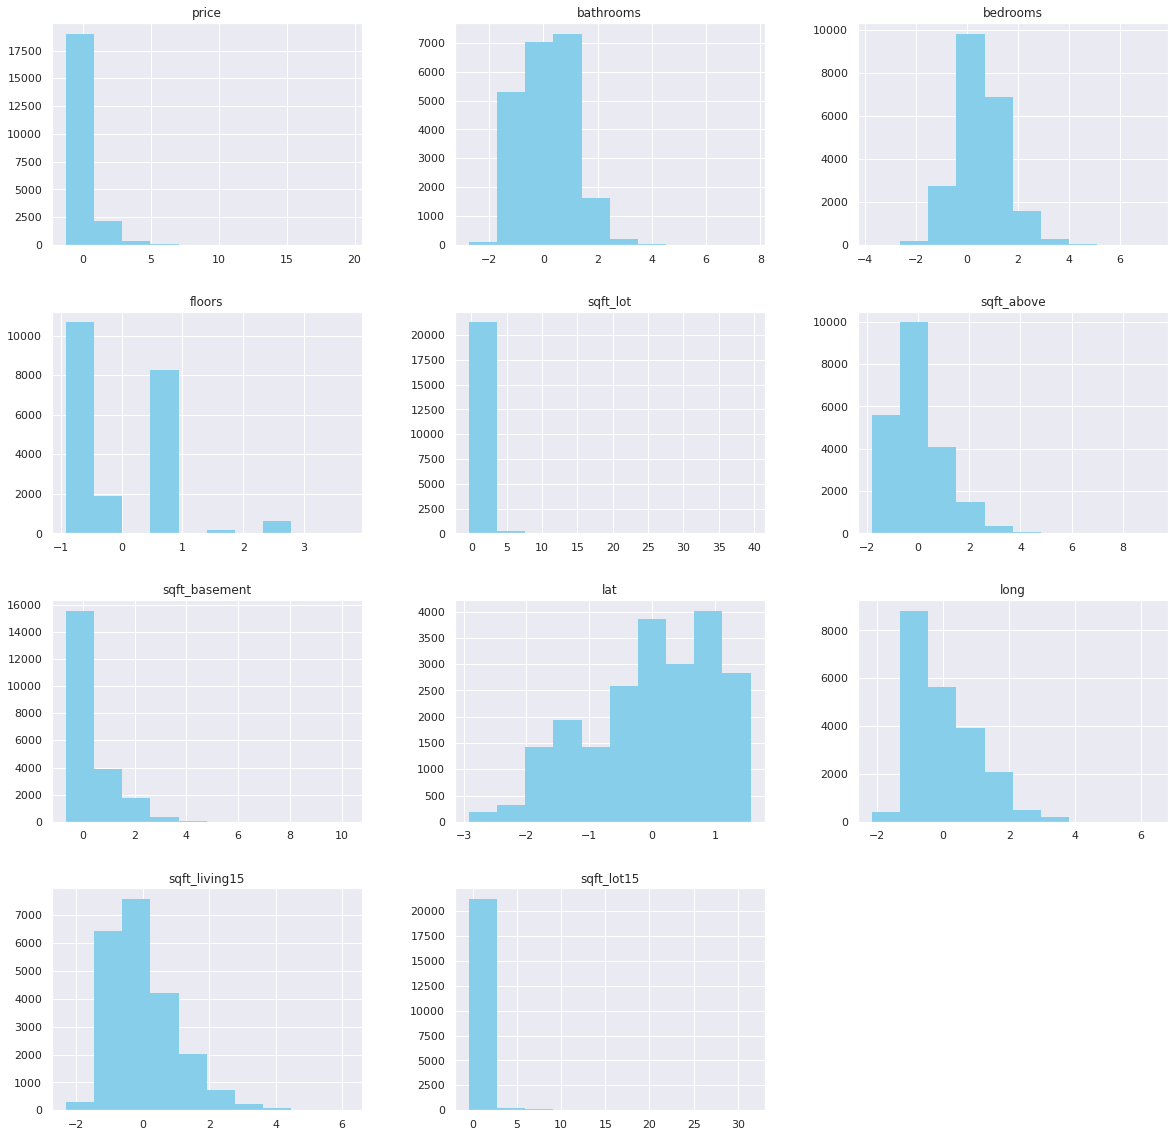

In [42]:
house_scaled.hist(figsize = (20,20), color = "skyblue", lw=0); #this function gives us histograms for each column

In [ ]:
#Bedrooms is very normal, which is good.st not really. We are more bothered about our target variable.
#https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html

In [ ]:
#keep the rest of the data mean normalized, but take a log transformation of price.

In [43]:
house_price_log= pd.DataFrame([]) #creating yet another dataframe to hold my numerical data
house_price_log = house_quantitative

house_price_log['price']= np.log(house_price_log['price']) #performing a log transformation on price

#manually performing mean normalization on the rest of our varaibles
house_price_log['bathrooms']= (house_price_log['bathrooms'] - house_price_log['bathrooms'].mean())/house_price_log['bathrooms'].std()
house_price_log['bedrooms']= (house_price_log['bedrooms'] - house_price_log['bedrooms'].mean())/house_price_log['bedrooms'].std()
house_price_log['floors']= (house_price_log['floors'] - house_price_log['floors'].mean())/house_price_log['floors'].std()
house_price_log['sqft_lot']= (house_price_log['sqft_lot'] - house_price_log['sqft_lot'].mean())/house_price_log['sqft_lot'].std()
house_price_log['sqft_above']= (house_price_log['sqft_above'] - house_price_log['sqft_above'].mean())/house_price_log['sqft_above'].std()
house_price_log['sqft_basement']= (house_price_log['sqft_basement'] - house_price_log['sqft_basement'].mean())/house_price_log['sqft_basement'].std()
house_price_log['lat']= (house_price_log['lat'] - house_price_log['lat'].mean())/house_price_log['lat'].std()
house_price_log['long']= (house_price_log['long'] - house_price_log['long'].mean())/house_price_log['long'].std()
house_price_log['sqft_living15']= (house_price_log['sqft_living15'] - house_price_log['sqft_living15'].mean())/house_price_log['sqft_living15'].std()
house_price_log['sqft_lot15']= (house_price_log['sqft_lot15'] - house_price_log['sqft_lot15'].mean())/house_price_log['sqft_lot15'].std()

house_price_log.head()

,price,bathrooms,bedrooms,floors,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,12.309982,-1.447384,-0.407182,-0.915399,-0.228328,-0.734687,-0.658587,-0.352513,-0.306158,-0.943407,-0.260725
1,13.195614,0.175632,-0.407182,0.936479,-0.189894,0.460816,0.245192,1.161552,-0.746408,-0.432755,-0.187882
2,12.100712,-1.447384,-1.510304,-0.915399,-0.123312,-1.229795,-0.658587,1.283514,-0.135739,1.070023,-0.172391
3,13.311329,1.149441,0.695940,-0.915399,-0.244020,-0.891673,1.397510,-0.283233,-1.271869,-0.914227,-0.284530
4,13.142166,-0.148971,-0.407182,-0.915399,-0.169664,-0.130898,-0.658587,0.409571,1.199214,-0.272264,-0.192863


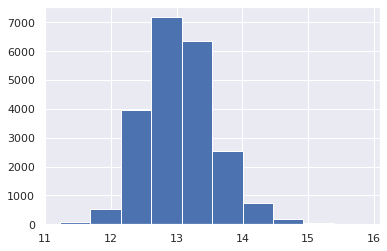

In [44]:
house_price_log['price'].hist() #let's just see how the shape of price changed

The data looks more normal now. Decreasing size of bins might make it look more like a normal curve.

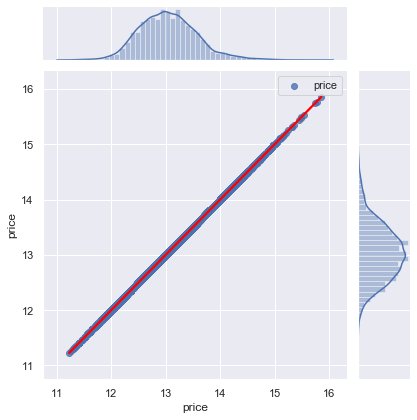

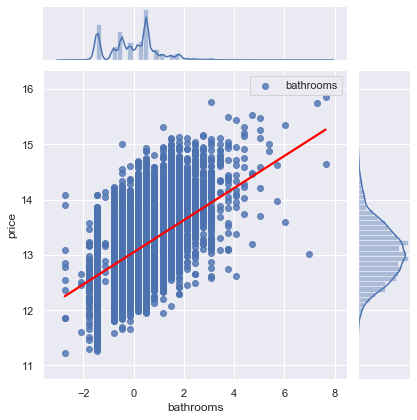

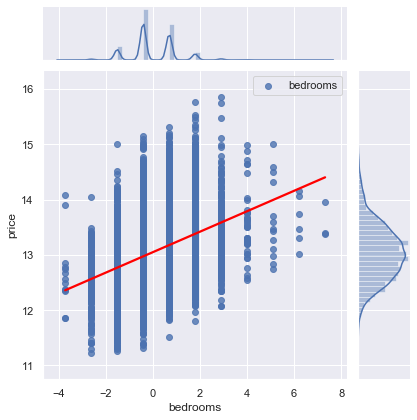

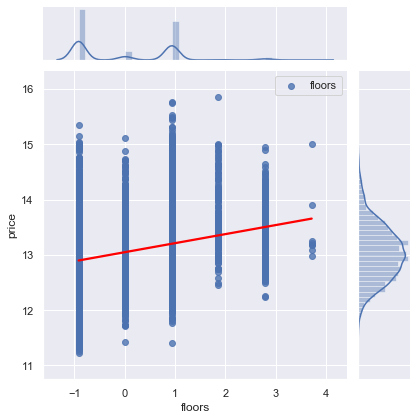

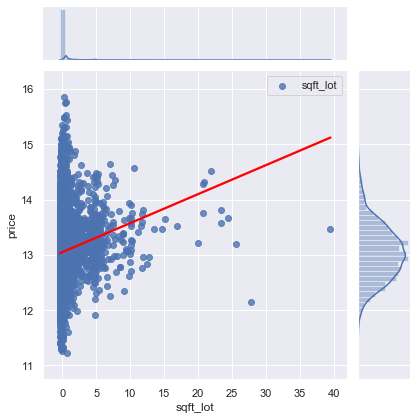

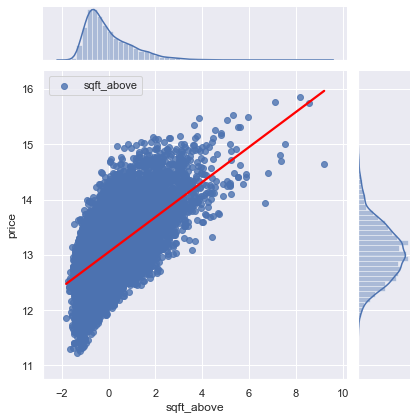

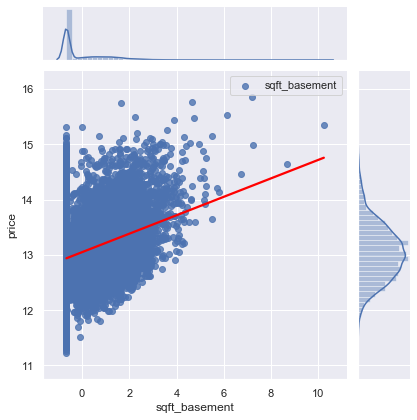

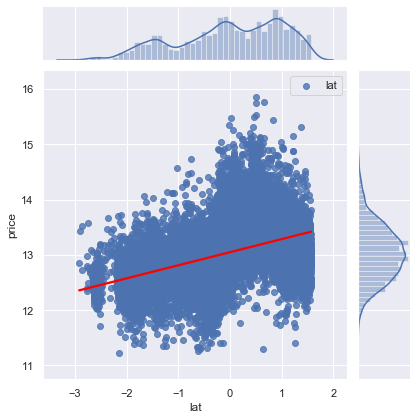

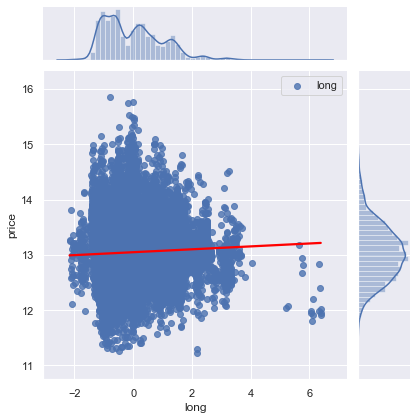

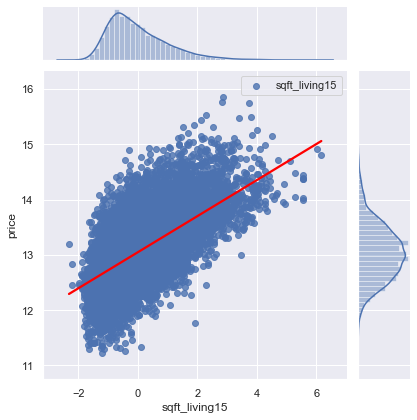

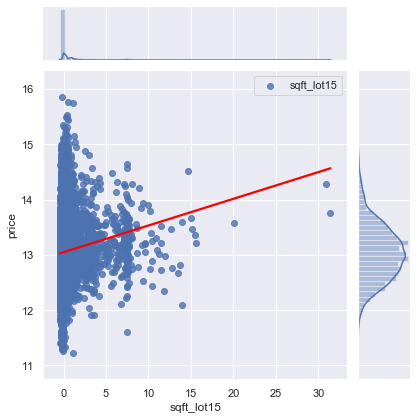

In [ ]:
#Seeing some more relationships with the features.

headers = list(house_price_log)
for column in headers:
    sns.jointplot(x=column, y="price", #creating our joint plot as well as setting our columns to be predictors and price to be our target
                  data=house_price_log, #we want the jointplots to be created using our house_price_log dataset
                  kind='reg',  ci=None,
                  label=column, 
                  joint_kws={'line_kws':{'color':'red'}}) #stylistic choices

    plt.legend() #including a legend for our plots
    plt.show()

Questions:

It looks like 
1.
bathrooms, bedrooms, sqft_lot, sqft_basement, sqft_above, sqft_living15, sqft_lot15 have very strong positive relationships 
2.Lat and floors have slighty weaker positive relationships 
3. an almost completely flat line in long

with price. 


We have one hot encoded the data for model fitting as well as final analysis.

In [45]:
#Add our categorical data to our numerical data
house_complete = pd.concat([house_price_log, house_categorical], axis=1) #combining our cat data and num data
house_complete.head()

,price,bathrooms,bedrooms,floors,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,waterfront_1,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,view_view,condition_avergage,condition_good
0,12.309982,-1.447384,-0.407182,-0.915399,-0.228328,-0.734687,-0.658587,-0.352513,-0.306158,-0.943407,-0.260725,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,13.195614,0.175632,-0.407182,0.936479,-0.189894,0.460816,0.245192,1.161552,-0.746408,-0.432755,-0.187882,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,12.100712,-1.447384,-1.510304,-0.915399,-0.123312,-1.229795,-0.658587,1.283514,-0.135739,1.070023,-0.172391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,13.311329,1.149441,0.695940,-0.915399,-0.244020,-0.891673,1.397510,-0.283233,-1.271869,-0.914227,-0.284530,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,13.142166,-0.148971,-0.407182,-0.915399,-0.169664,-0.130898,-0.658587,0.409571,1.199214,-0.272264,-0.192863,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [46]:
house_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 84 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               21611 non-null  float64
 1   bathrooms           21611 non-null  float64
 2   bedrooms            21611 non-null  float64
 3   floors              21611 non-null  float64
 4   sqft_lot            21611 non-null  float64
 5   sqft_above          21611 non-null  float64
 6   sqft_basement       21611 non-null  float64
 7   lat                 21611 non-null  float64
 8   long                21611 non-null  float64
 9   sqft_living15       21611 non-null  float64
 10  sqft_lot15          21611 non-null  float64
 11  waterfront_1        21611 non-null  uint8  
 12  zipcode_98002       21611 non-null  uint8  
 13  zipcode_98003       21611 non-null  uint8  
 14  zipcode_98004       21611 non-null  uint8  
 15  zipcode_98005       21611 non-null  uint8  
 16  zipc

The number of variables have gone up to 83.

Splitting data into train and test dataset

In [47]:
feature_cols = ['sqft_living15']
Y = house_complete.price
X = house_complete[feature_cols]
X.shape
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=0)

Fitiing Linear Regression model

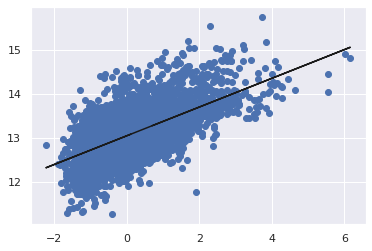

0.3832170830318534

In [48]:

lr = LinearRegression(normalize=True)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
  
plt.show() 
lr.score(X_train,y_train)


In [49]:
lr.score(X_test,y_test)

0.38492289282932274

This is the R^2 (R squared) value of the model which tells the goodness of fit and we can see the model does not have good R^2 value and might not be work well with new data.

Using more metrics to analyse the fitted model

In [50]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.32709032472730726
Mean Squared Error: 0.1722007434796208
Root Mean Squared Error: 0.4149707742475617


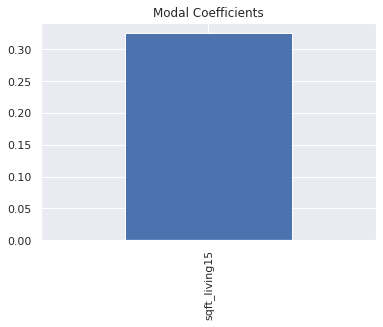

In [51]:
from pandas import Series
predictors = X_train.columns
coef = Series(lr.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [52]:
feature_cols = ['sqft_living15', 'bedrooms', 'bathrooms', 'lat','long']
Y = house_complete.price
X = house_complete[feature_cols]
X.shape
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=0)

In [53]:
lr = LinearRegression(normalize=True)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [54]:
lr.score(X_train, y_train)

0.6307908978284165

After using only few features the R^2 value has incresed indication good fit but there is no intuitive causality.

In [55]:
lr.score(X_test, y_test)

0.6340262448913969

array([ 0.24373496,  0.01601186,  0.14914744,  0.21161576, -0.06208744])

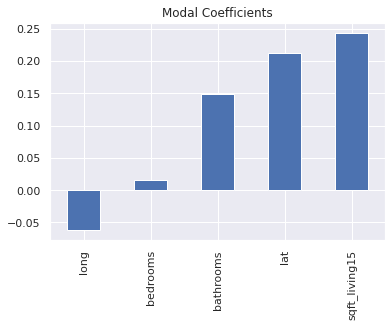

In [56]:
from pandas import Series
predictors = X_train.columns
coef = Series(lr.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')
lr.coef_


In [ ]:
#Selecting Variables based on p value
#For that we Use OLS from statmodel

In [57]:
house_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 84 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               21611 non-null  float64
 1   bathrooms           21611 non-null  float64
 2   bedrooms            21611 non-null  float64
 3   floors              21611 non-null  float64
 4   sqft_lot            21611 non-null  float64
 5   sqft_above          21611 non-null  float64
 6   sqft_basement       21611 non-null  float64
 7   lat                 21611 non-null  float64
 8   long                21611 non-null  float64
 9   sqft_living15       21611 non-null  float64
 10  sqft_lot15          21611 non-null  float64
 11  waterfront_1        21611 non-null  uint8  
 12  zipcode_98002       21611 non-null  uint8  
 13  zipcode_98003       21611 non-null  uint8  
 14  zipcode_98004       21611 non-null  uint8  
 15  zipcode_98005       21611 non-null  uint8  
 16  zipc

In [58]:
import statsmodels.api as sm #importing the necessary libraries
import statsmodels.formula.api as smf

col_names = house_complete.describe().columns[1:11] 



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [59]:
#Verifying if picked up the right columns
col_names

Index(['bathrooms', 'bedrooms', 'floors', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [60]:
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]] #creating an array to easily see the results we care about most
for idx, val in enumerate(col_names): #iterating through list of column names while also numbering them (that's the enumerate function)
    print("price~" + val) #labeling our results with their respective values
    f = 'price~' + val #building the formula
    model = smf.ols(formula=f, data=house_complete).fit() #fitting the line
    X_new = pd.DataFrame({val: [house_complete[val].min(), house_complete[val].max()]});# making a dataframe with the min and max values of our column
    preds = model.predict(X_new) #creating as well as storing our predictions
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])#adding each value's data to our array
    print(results[idx+1]) #viewing our results
    print(model.summary()) #shows the regression diagnostics summary
    #while we are extracting a few elements of the table to view them more clearly, the model summary can provide a lot of useful information

price~bathrooms
['bathrooms', 0.3034307514624297, 13.047865962635102, 0.29020814666817535, 0.0]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     9413.
Date:                Sat, 26 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:19:25   Log-Likelihood:                -12908.
No. Observations:               21611   AIC:                         2.582e+04
Df Residuals:                   21609   BIC:                         2.583e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

The above code shows Simple linear regression of Price with other independent features and thier summary table to select features based on P values.

In [61]:
pd.DataFrame(results) #viewing our final results for numerical columns

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bathrooms,0.303431,13.0479,0.290208,0
2,bedrooms,0.123552,13.0479,0.185184,0
3,floors,0.0964648,13.0479,0.163631,0
4,sqft_lot,0.00992715,13.0479,0.0524919,8.31652e-49
5,sqft_above,0.362251,13.0479,0.317092,0
6,sqft_basement,0.100478,13.0479,0.166999,0
7,lat,0.201692,13.0479,0.236605,0
8,long,0.00249471,13.0479,0.0263142,2.03127e-13
9,sqft_living15,0.383653,13.0479,0.326324,0


This shows that all features are significant this might be the result of the magnitude of the dataset.

In [ ]:
# All features are significant

In [ ]:
#Overall OLS Model
formula = 'price ~ ' + ' + '.join(col_names) #defining our formula
mod = smf.ols(formula=formula, data = house_complete) #completing an OLS regression on our model overall
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     4820.
Date:                Wed, 09 Dec 2020   Prob (F-statistic):               0.00
Time:                        06:16:24   Log-Likelihood:                -4140.9
No. Observations:               21611   AIC:                             8304.
Df Residuals:                   21600   BIC:                             8392.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.0479      0.002   6543.161      0.000      13.044      13.052
bathrooms         0.0398      0.003     11.751      0.000       0.033       0.046
bedrooms         -0.0302      0.003    -11.856      0.000      -0.035      -0.025
floors            0.0254      0.003      9.435      0.000       0.020       0.031
sqft_lot          0.0268      0.003      9.285      0.000       0.021       0.032
sqft_above        0.2196      0.004     54.098      0.000       0.212       0.228
sqft_basement     0.1250      0.003     46.243      0.000       0.120       0.130
lat               0.2076      0.002    101.569      0.000       0.204       0.212
long             -0.0584      0.002    -25.754      0.000      -0.063      -0.054
sqft_living15     0.1301      0.003     40.463      0.000       0.124       0.136
sqft_lot15       -0.0091      0.003     -3.116      0.002      -0.015      -0.003
==============================================================================
Omnibus:                      296.478   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              538.695
Skew:                           0.057   Prob(JB):                    1.06e-117
Kurtosis:                       3.765   Cond. No.                         4.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This is OLS model and this also shows every feature is significant.

OLS Regression - Categorical Variables

In [62]:
house_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 84 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               21611 non-null  float64
 1   bathrooms           21611 non-null  float64
 2   bedrooms            21611 non-null  float64
 3   floors              21611 non-null  float64
 4   sqft_lot            21611 non-null  float64
 5   sqft_above          21611 non-null  float64
 6   sqft_basement       21611 non-null  float64
 7   lat                 21611 non-null  float64
 8   long                21611 non-null  float64
 9   sqft_living15       21611 non-null  float64
 10  sqft_lot15          21611 non-null  float64
 11  waterfront_1        21611 non-null  uint8  
 12  zipcode_98002       21611 non-null  uint8  
 13  zipcode_98003       21611 non-null  uint8  
 14  zipcode_98004       21611 non-null  uint8  
 15  zipcode_98005       21611 non-null  uint8  
 16  zipc

In [63]:
#making group columns
 
cols_condition = house_complete.columns[82:84]
cols_waterfront = house_complete.columns[11:12]
cols_zipcode = house_complete.columns[12:81]
cols_view = house_complete.columns[81:82]

In [64]:
cols_condition

Index(['condition_avergage', 'condition_good'], dtype='object')

In [65]:
cols_waterfront

Index(['waterfront_1'], dtype='object')

In [66]:
cols_zipcode

Index(['zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072',
       'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092',
       'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106',
       'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112',
       'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118',
       'zipcode_98119', '

In [67]:
cols_view

Index(['view_view'], dtype='object')

In [68]:
#collecting all categorical columns for finding p values
cols = [cols_waterfront, cols_condition, cols_zipcode, cols_view] #creating a list to iterate through
for col in cols: #creating a for loop
    sum_cols = "+".join(col) #adding each variable to our formula
    form = "price ~" + sum_cols #creating our formula
    model = smf.ols(formula= form, data= house_complete).fit() #fitting our model
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     679.5
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          1.64e-147
Time:                        11:25:46   Log-Likelihood:                -16480.
No. Observations:               21611   AIC:                         3.296e+04
Df Residuals:                   21609   BIC:                         3.298e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0398      0.004   3681.281   

In [ ]:
#Zipcode has the best R suared value

In [ ]:
#We will now make a new dataframe that consists only of the predictors that had r2 values greater than or equal to .1

In [69]:
#first I am creating a new dataframe called "house_final" that only has the columns that I want to keep.
#dropping from categorical, watefront, view, condition

house_final = house_complete.drop(["sqft_lot","long","sqft_lot15","condition_avergage","condition_good","waterfront_1","view_view"], axis=1) #dropping  condition columns

We have dropped some features which were not important for our analysis.

In [70]:
house_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21611 non-null  float64
 1   bathrooms      21611 non-null  float64
 2   bedrooms       21611 non-null  float64
 3   floors         21611 non-null  float64
 4   sqft_above     21611 non-null  float64
 5   sqft_basement  21611 non-null  float64
 6   lat            21611 non-null  float64
 7   sqft_living15  21611 non-null  float64
 8   zipcode_98002  21611 non-null  uint8  
 9   zipcode_98003  21611 non-null  uint8  
 10  zipcode_98004  21611 non-null  uint8  
 11  zipcode_98005  21611 non-null  uint8  
 12  zipcode_98006  21611 non-null  uint8  
 13  zipcode_98007  21611 non-null  uint8  
 14  zipcode_98008  21611 non-null  uint8  
 15  zipcode_98010  21611 non-null  uint8  
 16  zipcode_98011  21611 non-null  uint8  
 17  zipcode_98014  21611 non-null  uint8  
 18  zipcod

The Categorical variables remaining are now 76 only.

In [71]:
#Final Model
final_cols = house_final.drop(['price'],axis=1) #let's see what our final model looks like
formula = 'price ~ ' + ' + '.join(final_cols) 
mod = smf.ols(formula=formula, data = house_final) 
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     1497.
Date:                Sat, 26 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:27:14   Log-Likelihood:                 3045.0
No. Observations:               21611   AIC:                            -5936.
Df Residuals:                   21534   BIC:                            -5321.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.6638      0.024    538.108      0.000      12.618      12.710
bathrooms         0.0403      0.002     16.407      0.000       0.036       0.045
bedrooms         -0.0166      0.002     -8.971      0.000      -0.020      -0.013
floors           -0.0191      0.002     -9.266      0.000      -0.023      -0.015
sqft_above        0.2341      0.003     80.008      0.000       0.228       0.240
sqft_basement     0.0917      0.002     46.187      0.000       0.088       0.096
lat               0.0576      0.011      5.026      0.000       0.035       0.080
sqft_living15     0.0967      0.002     39.487      0.000       0.092       0.101
zipcode_98002    -0.0283      0.019     -1.520      0.128      -0.065       0.008
zipcode_98003     0.0307      0.017      1.833      0.067      -0.002       0.064
zipcode_98004     0.9902      0.030     32.798      0.000       0.931       1.049
zipcode_98005     0.6305      0.032     19.789      0.000       0.568       0.693
zipcode_98006     0.5651      0.025     22.321      0.000       0.516       0.615
zipcode_98007     0.5557      0.033     17.074      0.000       0.492       0.620
zipcode_98008     0.5792      0.030     19.171      0.000       0.520       0.638
zipcode_98010     0.2536      0.024     10.620      0.000       0.207       0.300
zipcode_98011     0.2391      0.041      5.779      0.000       0.158       0.320
zipcode_98014     0.1705      0.037      4.590      0.000       0.098       0.243
zipcode_98019     0.1218      0.040      3.035      0.002       0.043       0.200
zipcode_98022     0.1632      0.019      8.397      0.000       0.125       0.201
zipcode_98023    -0.0209      0.015     -1.438      0.151      -0.049       0.008
zipcode_98024     0.3388      0.033     10.232      0.000       0.274       0.404
zipcode_98027     0.4253      0.023     18.271      0.000       0.380       0.471
zipcode_98028     0.2297      0.041      5.670      0.000       0.150       0.309
zipcode_98029     0.5048      0.026     19.164      0.000       0.453       0.556
zipcode_98030     0.0173      0.018      0.964      0.335      -0.018       0.052
zipcode_98031     0.0325      0.019      1.748      0.081      -0.004       0.069
zipcode_98032    -0.0336      0.023     -1.495      0.135      -0.078       0.010
zipcode_98033     0.6501      0.034     19.026      0.000       0.583       0.717
zipcode_98034     0.3816      0.037     10.338      0.000       0.309       0.454
zipcode_98038     0.1189      0.015      7.926      0.000       0.089       0.148
zipcode_98039     1.1058      0.041     26.749      0.000       1.025       1.187
zipcode_98040     0.8271      0.027     30.888      0.000       0.775       0.880
zipcode_98042     0.0355      0.015      2.366      0.018       0.006       0.065
zipcode_98045     0.2864      0.023     12.704   

This is the final fitted model with adjusted R squared being 84% which is a good fit.